In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageOps 
import matplotlib.image

# Importing the dataframe

In [2]:
#reading the csv
df = pd.read_csv("C:/Users/Qnouro/Desktop/Programming/Scrapper/leavesDatabase/leaf.csv", 
                  names = ["image array", "type 1", "type2"])

In [3]:
df.head()

,image array,type 1,type2
0,[[[132 124 113]\r\n [132 124 113]\r\n [133 1...,salicaceae,salix
1,[[[177 168 159]\r\n [182 173 164]\r\n [184 1...,tiliaceae,heliocarpus
2,[[[255 255 255]\r\n [255 255 255]\r\n [255 2...,alangiaceae,alangium
3,[[[176 169 161]\r\n [180 173 165]\r\n [181 1...,tiliaceae,grewia
4,[[[152 142 130]\r\n [152 142 130]\r\n [152 1...,rubiaceae,hymenopogon


In [4]:
df = df.drop("image array", axis=1)
df.head(10)

,type 1,type2
0,salicaceae,salix
1,tiliaceae,heliocarpus
2,alangiaceae,alangium
3,tiliaceae,grewia
4,rubiaceae,hymenopogon
5,salicaceae,salix
6,leguminosae,NaN
7,fagaceae,quercus
8,NaN,NaN
9,annonaceae,goniothalamus


In [5]:

img_path = "C:/Users/Qnouro/Desktop/Programming/Scrapper/leavesDatabase/"

end_path = ".jpg"

img_array = []


for i in range(4770):
    read_img = cv2.imread(img_path +str(i)+ end_path)
    #resizing
    size = (32, 32)
    fit_and_resized_image = cv2.resize(read_img, dsize=size, interpolation=cv2.INTER_CUBIC)
    img_array.append(fit_and_resized_image)
    

# Image visualisation

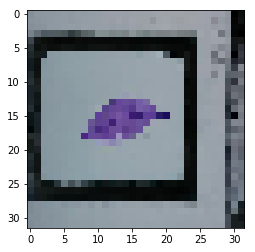

In [6]:
imgplot = plt.imshow(img_array[5])

In [7]:
df_copy = df

df_copy['img'] = img_array

In [8]:
df_copy.head()

,type 1,type2,img
0,salicaceae,salix,"[[[113, 124, 132], [115, 126, 134], [109, 119,..."
1,tiliaceae,heliocarpus,"[[[169, 177, 184], [167, 177, 184], [166, 176,..."
2,alangiaceae,alangium,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,tiliaceae,grewia,"[[[133, 139, 144], [145, 149, 154], [162, 166,..."
4,rubiaceae,hymenopogon,"[[[132, 144, 154], [135, 147, 157], [140, 150,..."


# Dropping NaNs

In [9]:
df_copy.dropna(inplace=True)

In [10]:
df_copy.head()

,type 1,type2,img
0,salicaceae,salix,"[[[113, 124, 132], [115, 126, 134], [109, 119,..."
1,tiliaceae,heliocarpus,"[[[169, 177, 184], [167, 177, 184], [166, 176,..."
2,alangiaceae,alangium,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,tiliaceae,grewia,"[[[133, 139, 144], [145, 149, 154], [162, 166,..."
4,rubiaceae,hymenopogon,"[[[132, 144, 154], [135, 147, 157], [140, 150,..."


In [11]:
len(df.index.values)

3246

In [12]:
first_type_array = pd.Series(df_copy['type 1']).unique()

In [13]:
nb = df_copy.loc[df_copy["type 1"] == (first_type_array)[0]]
len(nb)

96

In [14]:
len_array = []
for item in first_type_array:
    len_array.append(len(df_copy.loc[df_copy["type 1"] == item]))


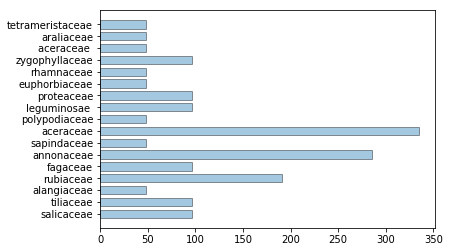

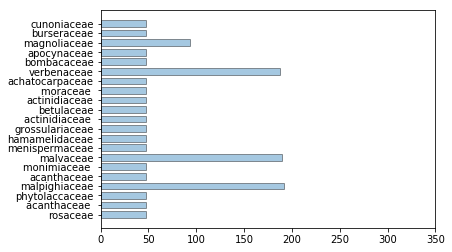

In [15]:
plt.barh([i for i in range(17)], len_array[:17], tick_label = first_type_array[:17], edgecolor="black", height=0.7, align='center', alpha=0.4)
plt.show()

plt.barh([i for i in range(17,len(len_array))], len_array[17:], tick_label = first_type_array[17:], edgecolor="black", height=0.7, align='center', alpha=0.4)
plt.xlim([0,350])
plt.show()

# balancing the dataset

In [16]:
df_copy_2 = df_copy.groupby('type 1')
df_copy_2 = df_copy_2.apply(lambda x: x.sample(df_copy_2.size().min())).reset_index(drop=True)

In [17]:
len_array = []
for item in first_type_array:
    len_array.append(df_copy_2["type 1"].value_counts())

len_array = df_copy_2["type 1"].value_counts()

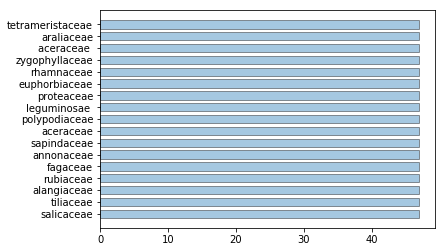

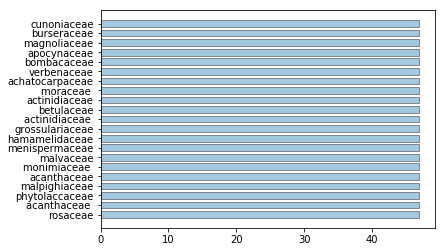

In [18]:
plt.barh([i for i in range(17)], len_array[:17], tick_label = first_type_array[:17], edgecolor="black", height=0.7, align='center', alpha=0.4)
plt.show()

plt.barh([i for i in range(17,len(len_array))], len_array[17:], tick_label = first_type_array[17:], edgecolor="black", height=0.7, align='center', alpha=0.4)
plt.show()

# Encoding

In [19]:
#One Hot Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

data = df_copy_2['type 1']

values = np.array(data)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# invert first example
inverted = label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
inverted = label_encoder.inverse_transform([32])


c:\users\qnouro\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [20]:
data = df_copy_2
data = pd.get_dummies(data, columns = ['type 1'])


In [21]:
X = data.iloc[:, 1:2].values

y = data.iloc[:, 2:].values


In [22]:
cp = []
for index, item in enumerate(X):
    cp.append(X[index][0])
X = np.asarray(cp)

In [23]:
data.head()

,type2,img,type 1_acanthaceae,type 1_acanthaceae,type 1_aceraceae,type 1_aceraceae,type 1_achatocarpaceae,type 1_actinidiaceae,type 1_actinidiaceae,type 1_alangiaceae,...,type 1_proteaceae,type 1_rhamnaceae,type 1_rosaceae,type 1_rubiaceae,type 1_salicaceae,type 1_sapindaceae,type 1_tetrameristaceae,type 1_tiliaceae,type 1_verbenaceae,type 1_zygophyllaceae
0,thunbergia,"[[[254, 254, 254], [255, 255, 255], [254, 254,...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,thunbergia,"[[[254, 254, 254], [255, 255, 255], [254, 254,...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,thunbergia,"[[[254, 254, 254], [255, 255, 255], [254, 254,...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,thunbergia,"[[[254, 254, 254], [255, 255, 255], [254, 254,...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,thunbergia,"[[[254, 254, 254], [255, 255, 255], [254, 254,...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Shuffling

In [24]:
preprocessed_df = data.sample(frac=1)

In [25]:
preprocessed_df.head(5)

,type2,img,type 1_acanthaceae,type 1_acanthaceae,type 1_aceraceae,type 1_aceraceae,type 1_achatocarpaceae,type 1_actinidiaceae,type 1_actinidiaceae,type 1_alangiaceae,...,type 1_proteaceae,type 1_rhamnaceae,type 1_rosaceae,type 1_rubiaceae,type 1_salicaceae,type 1_sapindaceae,type 1_tetrameristaceae,type 1_tiliaceae,type 1_verbenaceae,type 1_zygophyllaceae
921,amblygonocarpus,"[[[246, 251, 254], [243, 248, 251], [244, 249,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
550,alnus,"[[[131, 133, 143], [132, 136, 140], [137, 140,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
676,ceratopetalum,"[[[230, 232, 232], [255, 255, 255], [254, 254,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
672,ceratopetalum,"[[[230, 232, 232], [255, 255, 255], [254, 254,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
726,bernardia,"[[[254, 255, 255], [251, 251, 251], [254, 254,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Saving the data

In [26]:
preprocessed_df.to_pickle("preprocessedLeafDB.pkl")

In [27]:
read_df = pd.read_pickle("preprocessedLeafDB.pkl")

In [28]:
read_df.head(5)

,type2,img,type 1_acanthaceae,type 1_acanthaceae,type 1_aceraceae,type 1_aceraceae,type 1_achatocarpaceae,type 1_actinidiaceae,type 1_actinidiaceae,type 1_alangiaceae,...,type 1_proteaceae,type 1_rhamnaceae,type 1_rosaceae,type 1_rubiaceae,type 1_salicaceae,type 1_sapindaceae,type 1_tetrameristaceae,type 1_tiliaceae,type 1_verbenaceae,type 1_zygophyllaceae
921,amblygonocarpus,"[[[246, 251, 254], [243, 248, 251], [244, 249,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
550,alnus,"[[[131, 133, 143], [132, 136, 140], [137, 140,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
676,ceratopetalum,"[[[230, 232, 232], [255, 255, 255], [254, 254,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
672,ceratopetalum,"[[[230, 232, 232], [255, 255, 255], [254, 254,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
726,bernardia,"[[[254, 255, 255], [251, 251, 251], [254, 254,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


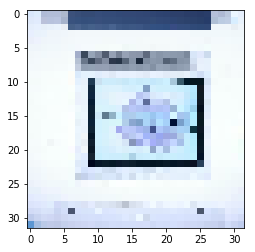

In [29]:
plt.imshow(read_df["img"][130])